In [1]:
import torch
from pathlib import Path
from PIL import Image

In [2]:
import zipfile

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_P = Path("/content/drive/MyDrive/archive_3.zip")


In [5]:
paath = Path("data/")
Image_Path = paath / "ECG"

In [8]:
with zipfile.ZipFile("/content/drive/MyDrive/archive_3.zip", "r") as f:
  print(f"Unzipping the file")
  f.extractall(Image_Path)

Unzipping the file


In [10]:
# data_path = Path("ECG/")
# Image_Path = data_path / "ECG_Image_data"

In [9]:
device = "cuda" if torch.cuda.is_available() == True else "cpu"

In [10]:
device

'cuda'

In [11]:
Image_Path

PosixPath('data/ECG')

In [12]:
train_dir = Image_Path / "ECG_Image_data" / "train"
test_dir = Image_Path / "ECG_Image_data" / "test"

In [13]:
train_dir,test_dir

(PosixPath('data/ECG/ECG_Image_data/train'),
 PosixPath('data/ECG/ECG_Image_data/test'))

In [14]:
import random

Image_Path_list = list(Image_Path.glob("*/*/*/*.png"))

In [15]:
Image_Path_list[:10]

[PosixPath('data/ECG/ECG_Image_data/train/F/F626.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F759.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F602.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F275.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F314.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F351.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F59.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F463.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F795.png'),
 PosixPath('data/ECG/ECG_Image_data/train/F/F307.png')]

In [16]:
len(Image_Path_list)

123998

Image height: 288
Image width: 432
Image class: F


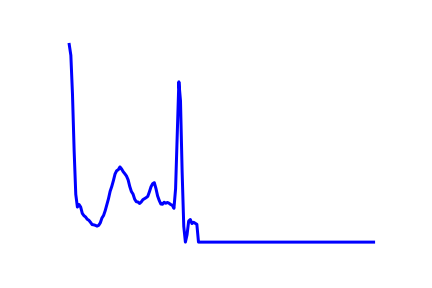

In [17]:
img = Image.open(Image_Path_list[5])
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
print(f"Image class: {Image_Path_list[5].parent.stem}")
img

### Loading it into the DataLoader and and transforming it into tensor using `torchvision`

In [18]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets

In [19]:
data_transformer = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [20]:
from matplotlib import pyplot as plt

In [21]:
def Comparator101(image_path, transformer,n=4):

    random_image_paths = random.sample(image_path,k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Image: {f.size}")
            ax[0].axis(False)

            transformed_image = transformer(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed Image: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class : {image_path.parent.stem}")



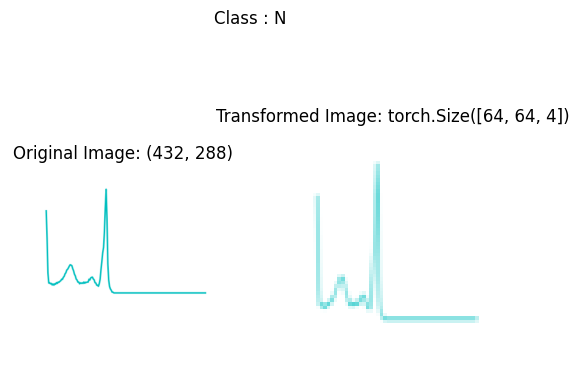

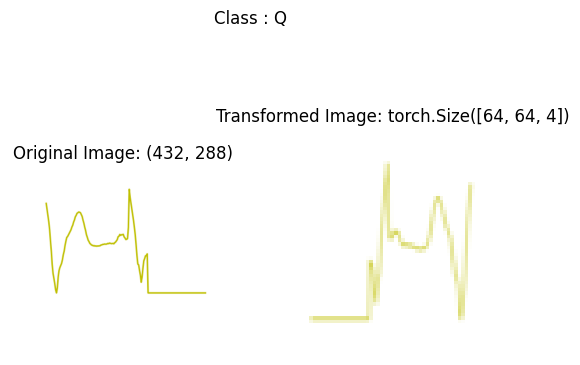

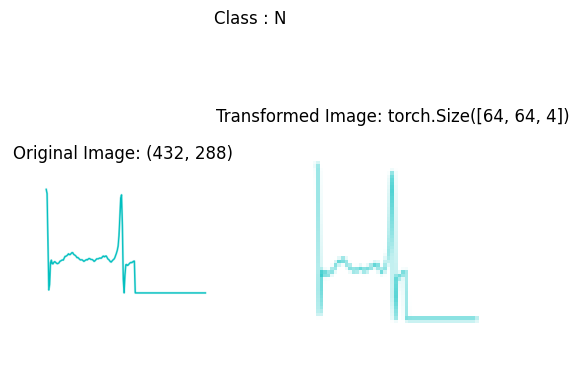

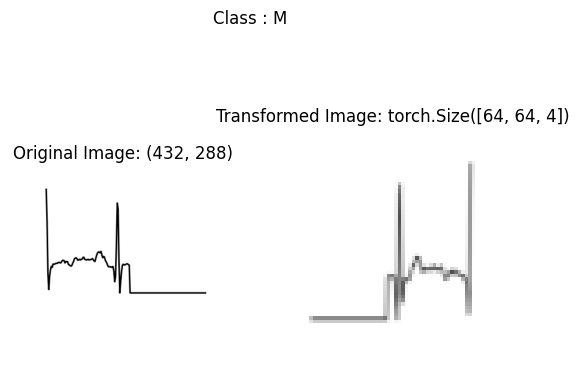

In [22]:
Comparator101(image_path=Image_Path_list,transformer=data_transformer,n=4)

## Creating the Dataset and DataLoader

In [23]:
from torch.utils.data import DataLoader
from torchvision import datasets

In [24]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transformer,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transformer,
                                 target_transform=None)

In [25]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 99199
     Root location: data/ECG/ECG_Image_data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 24799
     Root location: data/ECG/ECG_Image_data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [26]:
len(test_data)

24799

In [27]:
labels = train_data.classes

In [28]:
labels

['F', 'M', 'N', 'Q', 'S', 'V']

In [29]:
labels_as_dict = train_data.class_to_idx

In [30]:
labels_as_dict

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}

In [31]:
sample_image,clas = train_data[9][0],train_data[9][1]
sample_image,clas

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 0)

In [32]:
labels[clas]

'F'

In [33]:
import os
os.cpu_count()


2

In [34]:
len(train_data)

99199

In [35]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=os.cpu_count())


In [36]:
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=True,
                             num_workers=os.cpu_count())

In [37]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a345739f790>,
 <torch.utils.data.dataloader.DataLoader at 0x7a345739f880>)

In [38]:
img,label = next(iter(train_dataloader))
print(f"Image Shape: {img.shape}")
print(f"Label shape : {label.shape}")

Image Shape: torch.Size([32, 3, 64, 64])
Label shape : torch.Size([32])


### Replicating the TinyVGG Architecture

In [39]:
from torch import nn

In [40]:
class TinyVGG(nn.Module):
    def __init__(self,inPut:int, hidden: int, outPut: int):
        super().__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=inPut,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.MaxPool2d(stride=2,kernel_size=3)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,kernel_size=3,stride=1,padding=1,out_channels=hidden),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden*841,
                      out_features=outPut)
        )

    def forward(self,x : torch.tensor):
        x = self.block1(x)
        # print(f"shape after block 1 : {x.shape}")
        x = self.block2(x)
        # print(f"Shape after block 2 : {x.shape}")
        x = self.classifier(x)
        # print(f"Shape after classifeir layer : {x.shape}")

        return x

In [41]:
len(labels)

6

In [42]:
model_0 = TinyVGG(inPut=3, hidden=10, outPut=len(labels)).to(device)

In [43]:
model_0(img.to(device))

tensor([[-0.0080,  0.0666, -0.0282, -0.0509, -0.0195,  0.0404],
        [-0.0082,  0.0673, -0.0276, -0.0513, -0.0196,  0.0409],
        [-0.0080,  0.0660, -0.0281, -0.0504, -0.0189,  0.0400],
        [-0.0084,  0.0674, -0.0280, -0.0509, -0.0197,  0.0405],
        [-0.0080,  0.0668, -0.0281, -0.0509, -0.0199,  0.0410],
        [-0.0085,  0.0680, -0.0285, -0.0509, -0.0194,  0.0417],
        [-0.0086,  0.0673, -0.0279, -0.0508, -0.0194,  0.0407],
        [-0.0074,  0.0651, -0.0279, -0.0505, -0.0200,  0.0416],
        [-0.0072,  0.0654, -0.0276, -0.0519, -0.0194,  0.0409],
        [-0.0073,  0.0659, -0.0278, -0.0527, -0.0184,  0.0408],
        [-0.0076,  0.0664, -0.0282, -0.0512, -0.0189,  0.0412],
        [-0.0078,  0.0664, -0.0278, -0.0509, -0.0188,  0.0400],
        [-0.0078,  0.0672, -0.0273, -0.0511, -0.0189,  0.0406],
        [-0.0084,  0.0665, -0.0287, -0.0509, -0.0193,  0.0408],
        [-0.0077,  0.0663, -0.0278, -0.0512, -0.0193,  0.0412],
        [-0.0091,  0.0658, -0.0288, -0.0

In [44]:
def train_step(model: torch.nn.Module,
               dataloader: DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               ):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [45]:
def test_step(model: torch.nn.Module,
              dataloader: DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [46]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [47]:
model = TinyVGG(inPut=3,hidden=16,outPut=len(labels)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

model_results = train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloader,
                      loss_fn=loss_fn,
                      optimizer=optimizer,
                      epochs=1)


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0572 | train_acc: 0.9839 | test_loss: 0.0060 | test_acc: 0.9998


In [48]:
device

'cuda'

In [50]:
!nvidia-smi

Thu Jan 11 18:38:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0              32W /  70W |    299MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [55]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "ECGV1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to models/ECGV1.pth
